In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Abstracto

La industria de las aplicaciones móviles se ha convertido en un ecosistema altamente competitivo, donde la innovación y la estrategia son fundamentales para el éxito. En este escenario, nuestra empresa consultora ofrece un servicio especializado que tiene como objetivo proporcionar a nuestros clientes una ventaja competitiva en el mercado de aplicaciones.

# Contexto Comercial

En un mundo impulsado por la tecnología, las aplicaciones móviles se han convertido en una parte integral de la vida cotidiana. Ya sea para entretenimiento, productividad o conectividad, las aplicaciones desempeñan un papel crucial en la forma en que las personas interactúan con sus dispositivos móviles. La proliferación de aplicaciones y el auge de las tiendas de aplicaciones, como Google Play Store, han generado un mercado diversificado y en constante evolución.

# Problema Comercial

Nuestros clientes, en su búsqueda por lanzar una aplicación exitosa, se enfrentan a desafíos significativos. El mercado es competitivo, con miles de aplicaciones que compiten por la atención de los usuarios. Las decisiones relacionadas con el modelo de negocio, el precio, la categoría de la aplicación y otros factores, pueden determinar el éxito o el fracaso en este entorno dinámico. Por lo tanto, es crucial comprender cómo las diferentes variables afectan el rendimiento de una aplicación en el mercado.

# Contexto Analítico

Para abordar este desafío, hemos llevado a cabo un análisis de datos detallado de diversas variables clave que influyen en el rendimiento de las aplicaciones móviles. Este análisis se basa en un conjunto de datos recopilado de la Google Play Store y se centra en comprender las relaciones entre las categorías de aplicaciones, el precio, las calificaciones de los usuarios, el tamaño de las aplicaciones y otros factores relevantes.

# Preguntas y Objetivos

El objetivo de este análisis es proporcionar información valiosa que ayude a nuestros clientes a tomar decisiones más informadas en su estrategia de desarrollo y lanzamiento de aplicaciones. Nos proponemos responder a preguntas clave, como: ¿Cuántas más descargas tienen las aplicaciones de una misma categoría siendo gratuitas que siendo de pago? ¿Cómo afecta el tamaño de una aplicación a su popularidad y calificaciones? ¿Cuál es la relación entre las revisiones de los usuarios y las calificaciones de las aplicaciones?

En el proceso, también evaluaremos hipótesis relacionadas con la influencia de factores como el precio, el tamaño y la categoría de la aplicación en su éxito en el mercado. A través de este análisis, nuestra empresa consultora busca brindar a nuestros clientes una ventaja competitiva, permitiéndoles tomar decisiones estratégicas fundamentadas en datos sólidos.

# Informe de Análisis
En este informe iremos detallando, a medida que avancemos con el trabajo, distintos insights en relación a la información obtenida con el análisis de los datos.
Para esta entrega agregaremos a las conclusiones obtenidas de la entrega anterior algunas preguntas e hipótesis más.


In [ ]:
df = pd.read_csv('Google Play Store.csv', index_col=0)  ## cargamos el csv
df.head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


##Limpieza y transformación de datos

In [ ]:
##Utilizando la función lambda, limpiamos completamente el dataset y transformamos las variables para poder realizar análisis numéricos
df = df.loc[df['Installs'] != 'Free'].copy()
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Price'] = df['Price'].apply(lambda x: float(str(x).replace('$', '')) if '$' in str(x) else float(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df = df.drop_duplicates()
df.loc[df['Rating'] == 19.0, 'Rating'] = 1.9 #Varias correcciones son explicadas en mayor detalle en la entrega anterior

In [ ]:
df.head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


#Análisis exploratorio de datos:
Comenzamos el trabajo con un simple EDA:
En el podemos observar las aplicaciones, separadas en colores por pagas y gratis, enfrentadas en scatterplots de distintas variables: Rating, Tamaño de app, descargas, reviews y precio.
En la línea del centro, se ven histogramas de las mismas, los cuales nos indican la cantidad y distribución de sus variables.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


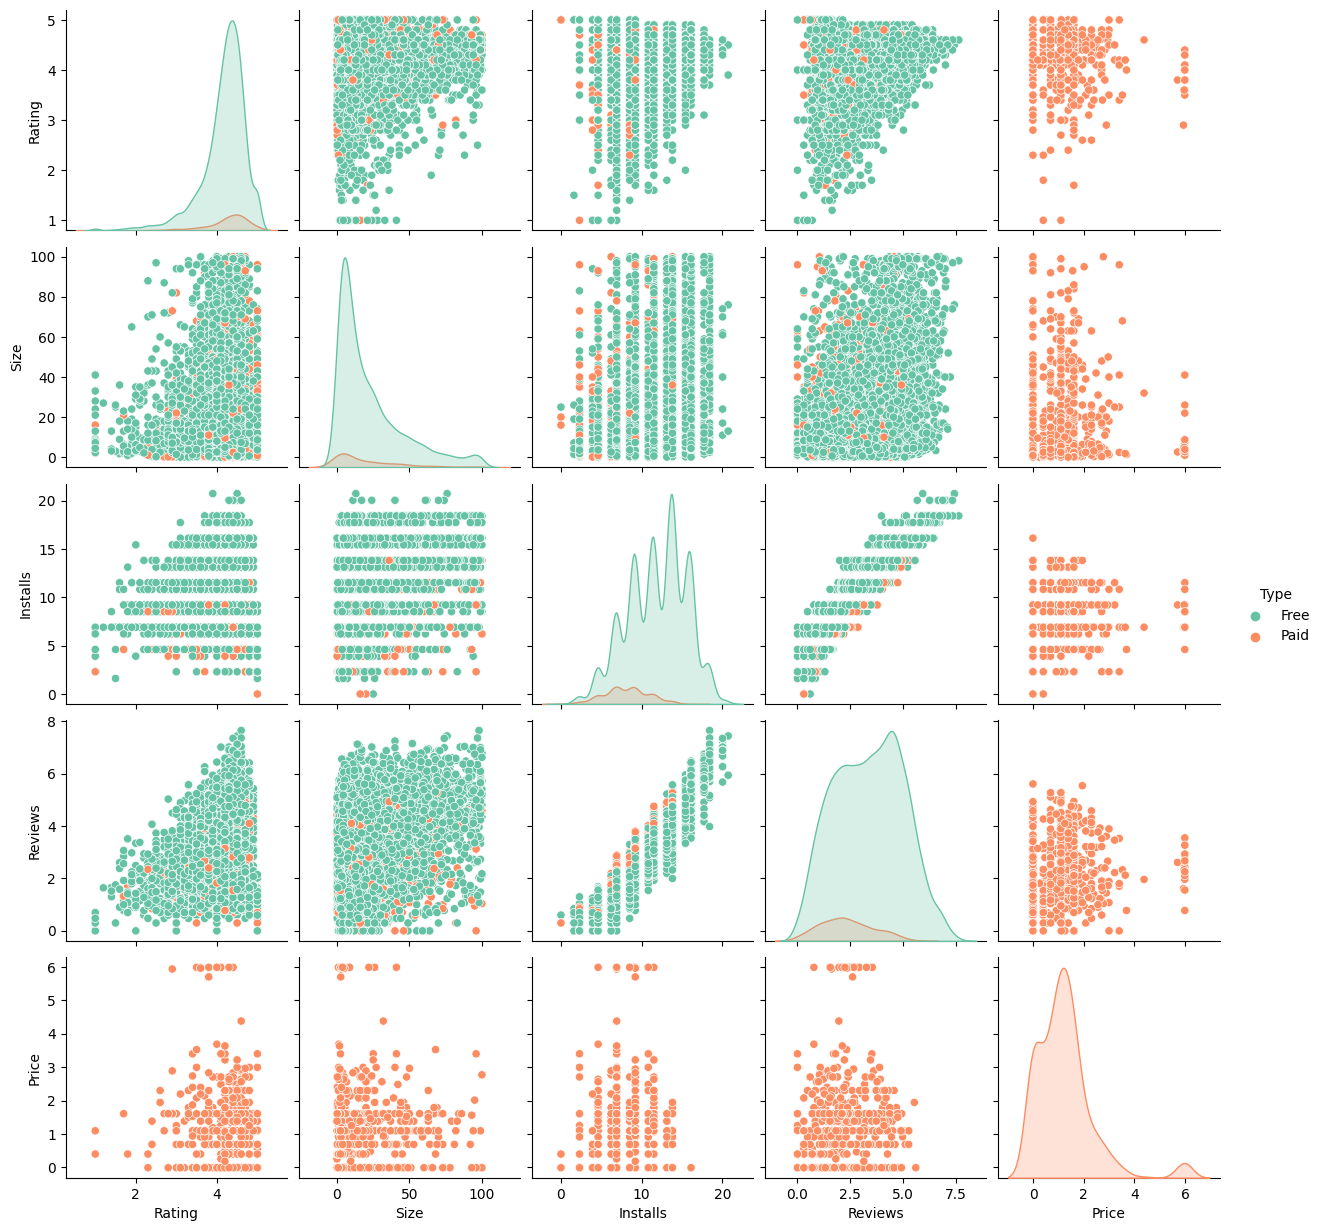

In [ ]:
# Por las dudas a cada columna se le agrega un dropna y se la pone en una variable a analizar distinta.
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
r = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
p = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(r), t, np.log(p))),
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2") #usé escala logarítmica sino los histogramas eran líneas
                        #El error que se observa abajo es porque intenta hacer logaritmo de 0 cuando las aplicaciones son gratis. Sin embargo no lo hace y el gráfico funciona de todas formas.


De estos gráficos nos validaremos a futuro para realizar análisis más profundos. A simple vista sin embargo, no se ven relaciones en los scatterplots.

Para algunas hipótesis nos validamos de la idea de que las aplicaciones pagas son menos descargadas que las gratis. Si bien parece una obviedad, lo graficamos para no dejar lugar a dudas, y entender la magnitud de la diferencia:

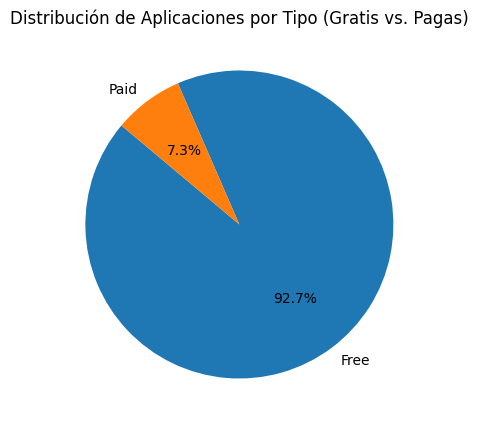

In [ ]:
type_counts = df['Type'].value_counts()

# Crear un gráfico de torta para la columna "Type"
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Aplicaciones por Tipo (Gratis vs. Pagas)')
plt.show()



¿Existe una diferencia notable en la puntuación de las aplicaciones en relación a su categoría?
Para ello primero averiguamos cual es el promedio de rating de todas las aplicaciones.

# Hipótesis:

Hipótesis nula (H0): No existe una diferencia significativa entre la media de rating general de todas las aplicaciones y la media de rating de una categoría específica.
Hipótesis alternativa (H1): Existe una diferencia significativa entre la media de rating general de todas las aplicaciones y la media de rating de una categoría específica.


In [ ]:
print('Average app rating = ', np.mean(x))

Average app rating =  4.171399676375405


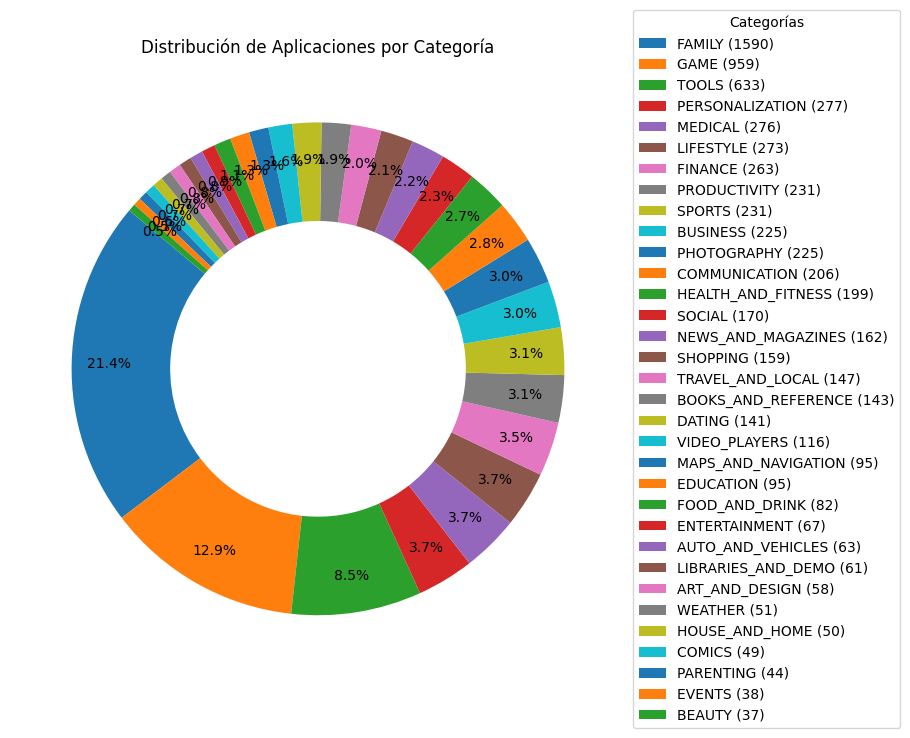

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de aplicaciones por categoría
category_counts = df['Category'].value_counts()

# Crear un gráfico de torta para la columna "Category" sin agujero
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    category_counts, startangle=140, autopct='%1.1f%%', pctdistance=0.85,
    wedgeprops=dict(width=0.4)
)

# Agregar un cuadro con los labels en el lado derecho
sorted_labels = [f"{label} ({count})" for label, count in zip(category_counts.index, category_counts)]
plt.legend(wedges, sorted_labels, title='Categorías', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribución de Aplicaciones por Categoría')
plt.show()


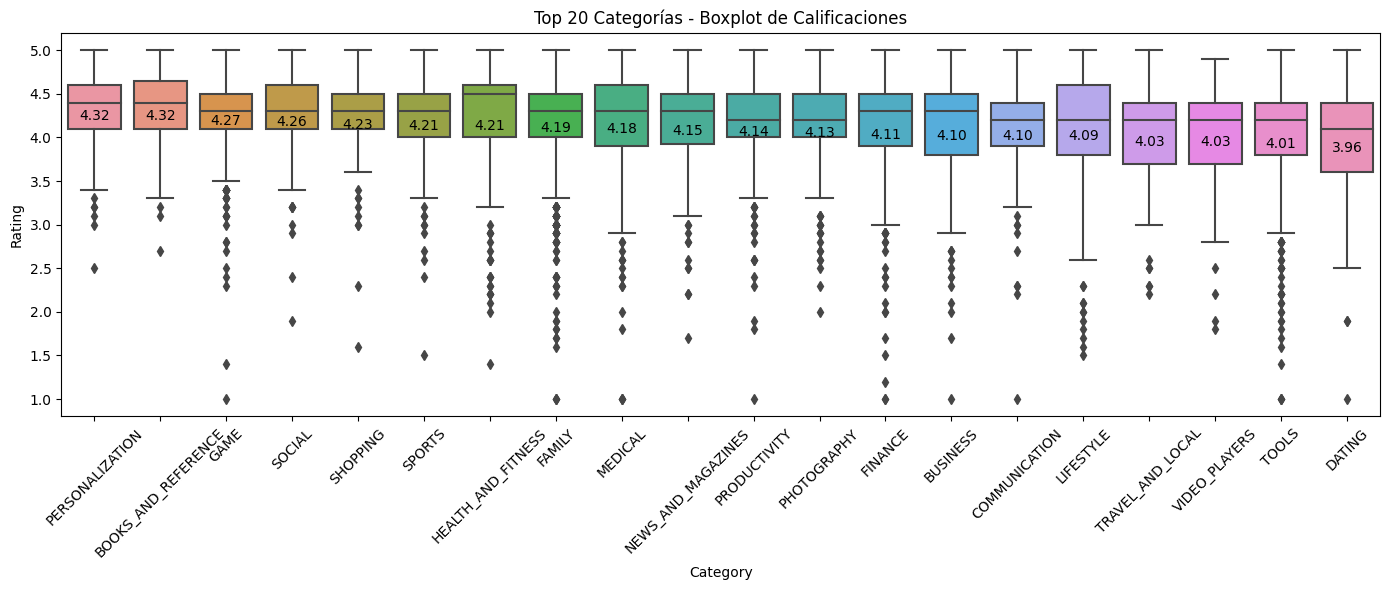

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra las 20 categorías más populares
top_20_categories = df['Category'].value_counts().head(20).index
df_top_20 = df[df['Category'].isin(top_20_categories)]

media_ratings = df_top_20.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_20, x='Category', y='Rating', order=media_ratings.index)
plt.title('Top 20 Categorías - Boxplot de Calificaciones')
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar las medias como etiquetas
for i, cat in enumerate(media_ratings.index):
    plt.text(i, media_ratings[cat], f'{media_ratings[cat]:.2f}', ha='center', va='top', color='black', fontsize=10)

plt.show()

In [ ]:
from scipy import stats

mean_total = np.mean(df['Rating'])

media_ratings = df_top_20.groupby('Category')['Rating'].mean().sort_values(ascending=False)

t_statistic, p_value = stats.ttest_ind([mean_total] * len(media_ratings), media_ratings)

print("Estadística t:", t_statistic)
print("Valor p:", p_value)

alpha = 0.5
if p_value < alpha:
    print("Diferencia estadísticamente significativa. Rechazar H0.")
else:
    print("No hay diferencia estadísticamente significativa. No rechazar H0.")


Estadística t: 0.8818627091441447
Valor p: 0.38339542006386107
Diferencia estadísticamente significativa. Rechazar H0.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Por desgracia, no podemos con estos valores descartar la hipótesis nula en lo absoluto. Sin embargo, con apreciar los gráficos podemos deducir que:


*   Libros y referencias posee muy buenas puntuaciones y baja cantidad de aplicaciones de mala calidad
*   Las aplicaciones de citas poseen un nivel de reviews de los más bajos en comparación al promedio
*   Finanzas, negocios y herramientas poseen muchas apps que consideraremos "basura"
*   Todas las aplicaciones, dentro de todo, poseen un buen score.





Pregunta:
¿Existe una relación significativa entre el tipo de aplicación (gratuita o de pago) y la cantidad de puntuaciones (reviews) de la aplicación en Google Play Store? Además, ¿cómo afecta el rating de las aplicaciones a esta relación?

En este apartado, lo que haremos será hacer una relación entre descargas y reviews. ¿Por qué? Utilizaremos esta variable nueva llamada proporción de reseñas, la cual será la cantidad de reseñas dividido la cantidad de descargas, para poder comparar distintas aplicaciones como si ambas tuviesen la misma cantidad de descargas, y ver entonces para dada cantidad de descargas la cantidad de reviews que tiene la misma.
El objetivo de esto es entender cuan dispuesto está un usuario a puntuar una app. La hipótesis es, por supuesto, que si uno paga por una app está mas dispuesto a puntuarla positiva o negativamente, mientras que quienes descargan apps de forma gratuita, le dan menos importancia a eso.

Hipótesis Nula (H0):
La cantidad de puntuaciones por descarga para aplicaciones gratuitas (Y₀) es mayor o igual que la cantidad de puntuaciones por descarga para aplicaciones de pago (Y₁) en función del rating (X) de las aplicaciones: H0: Y₁ᵢ ≤ Y₀ᵢ para todo valor de i, donde i = x.

Hipótesis Alternativa (H1):
La cantidad de puntuaciones por descarga para aplicaciones gratuitas (Y₀) es mayor que la cantidad de puntuaciones por descarga para aplicaciones de pago (Y₁) en función del rating (X) de las aplicaciones: H1: Y₁ᵢ > Y₀ᵢ para todo valor de i, donde i = x.

In [ ]:
df_playstore_paid = df[df['Type'] != 'Free'].copy()
df_playstore_paid #Este será el dataframe donde están las apps pagas
df_playstore_free = df[df['Type'] == 'Free'].copy()
df_playstore_free  #Este será el dataframe donde están las apps gratis
average_reviews_by_rating = df_playstore_free.groupby('Rating')['Reviews'].mean()
average_reviews_by_rating2 = df_playstore_paid.groupby('Rating')['Reviews'].mean()
df_playstore_free['Reviews Proportion'] = df_playstore_free['Reviews'] / df_playstore_free['Installs']
df_playstore_paid['Reviews Proportion'] = df_playstore_paid['Reviews'] / df_playstore_paid['Installs']

In [ ]:
df_playstore_paid.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Proportion
App,,,,,,,,,,,,,
TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,0.11442
Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,0.10295
Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,0.18247
"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000.0,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,0.15450
Calculator,DATING,2.6,57,6.2,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,0.05700


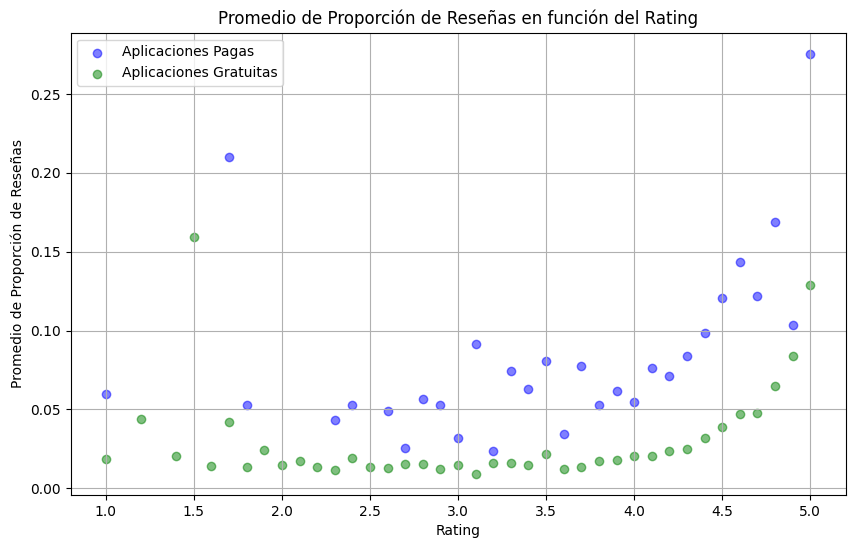

In [ ]:
average_reviews_by_rating_paid = df_playstore_paid.groupby('Rating')['Reviews Proportion'].mean().reset_index()
average_reviews_by_rating_free = df_playstore_free.groupby('Rating')['Reviews Proportion'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Gráfico para aplicaciones pagas (en azul)
plt.scatter(average_reviews_by_rating_paid['Rating'], average_reviews_by_rating_paid['Reviews Proportion'], alpha=0.5, label='Aplicaciones Pagas', color='blue')

# Gráfico para aplicaciones gratuitas (en verde)
plt.scatter(average_reviews_by_rating_free['Rating'], average_reviews_by_rating_free['Reviews Proportion'], alpha=0.5, label='Aplicaciones Gratuitas', color='green')

plt.xlabel('Rating')
plt.ylabel('Promedio de Proporción de Reseñas')
plt.title('Promedio de Proporción de Reseñas en función del Rating')
plt.grid(True)
plt.legend()
plt.show()

En este gráfico se puede observar, a simple vista, que la cantidad sobre instalaciones es mayor en las aplicaciones pagas que en las aplicaciones gratuitas. Esto significa que, para todo x observable, y1 >= y0. Sin embargo, estos datos podrían ser explicados tan solo por el azar. Necesitamos algún indicador que diga que existe, efectivamente, una relación entre estos datos. Lo primero que haré, será(a criterio propio), eliminar todas las aplicaciones con rating menor a 3.0, es decir, lo que llamaremos apps basura. Veamos entonces como quedan los datos:

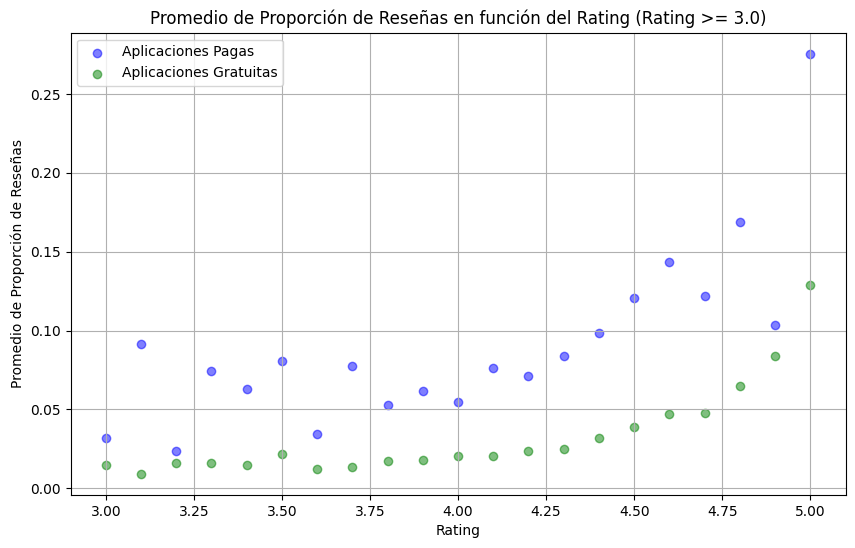

In [ ]:
df_playstore_paid = df_playstore_paid[df_playstore_paid['Rating'] >= 3.0]
df_playstore_free = df_playstore_free[df_playstore_free['Rating'] >= 3.0]

# Calcula el promedio de la proporción de reseñas para aplicaciones pagas y gratuitas
average_reviews_by_rating_paid = df_playstore_paid.groupby('Rating')['Reviews Proportion'].mean().reset_index()
average_reviews_by_rating_free = df_playstore_free.groupby('Rating')['Reviews Proportion'].mean().reset_index()

# Crea el gráfico con las aplicaciones filtradas
plt.figure(figsize=(10, 6))

# Gráfico para aplicaciones pagas (en azul)
plt.scatter(average_reviews_by_rating_paid['Rating'], average_reviews_by_rating_paid['Reviews Proportion'], alpha=0.5, label='Aplicaciones Pagas', color='blue')

# Gráfico para aplicaciones gratuitas (en verde)
plt.scatter(average_reviews_by_rating_free['Rating'], average_reviews_by_rating_free['Reviews Proportion'], alpha=0.5, label='Aplicaciones Gratuitas', color='green')

plt.xlabel('Rating')
plt.ylabel('Promedio de Proporción de Reseñas')
plt.title('Promedio de Proporción de Reseñas en función del Rating (Rating >= 3.0)')
plt.grid(True)
plt.legend()
plt.show()







Sobre estos datos hago una regresión polinómica y veo como quedan las curvas

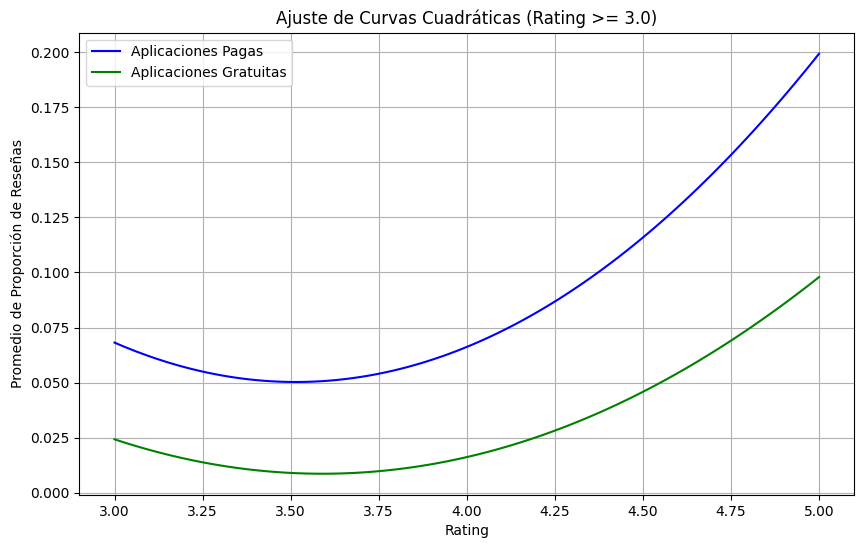

In [ ]:
x_paid = average_reviews_by_rating_paid['Rating']
y_paid = average_reviews_by_rating_paid['Reviews Proportion']

x_free = average_reviews_by_rating_free['Rating']
y_free = average_reviews_by_rating_free['Reviews Proportion']

coefficients_paid = np.polyfit(x_paid, y_paid, 2)
polynomial_paid = np.poly1d(coefficients_paid)
coefficients_free = np.polyfit(x_free, y_free, 2)
polynomial_free = np.poly1d(coefficients_free)

x_curve = np.linspace(x_paid.min(), x_paid.max(), 100)
y_curve_paid = polynomial_paid(x_curve)
y_curve_free = polynomial_free(x_curve)

plt.figure(figsize=(10, 6))

plt.plot(x_curve, y_curve_paid, label='Aplicaciones Pagas', color='blue')
plt.plot(x_curve, y_curve_free, label='Aplicaciones Gratuitas', color='green')

plt.xlabel('Rating')
plt.ylabel('Promedio de Proporción de Reseñas')
plt.title('Ajuste de Curvas Cuadráticas (Rating >= 3.0)')
plt.grid(True)
plt.legend()
plt.show()

Esto que vemos aquí abajo, son las fórmulas de las curvas. La primera x (primer coeficiente) está elevada al cuadradado, solo que el 2 se ve que queda por fuera de la ecuación



In [ ]:
print('Fórmula aplicaciones pagas: ' + str(polynomial_paid))
print('Fórmula aplicaciones gratuitas: ' + str(polynomial_free))


Fórmula aplicaciones pagas:          2
0.06348 x - 0.4396 x + 0.8147
Fórmula aplicaciones gratuitas:          2
0.04522 x - 0.3252 x + 0.5935


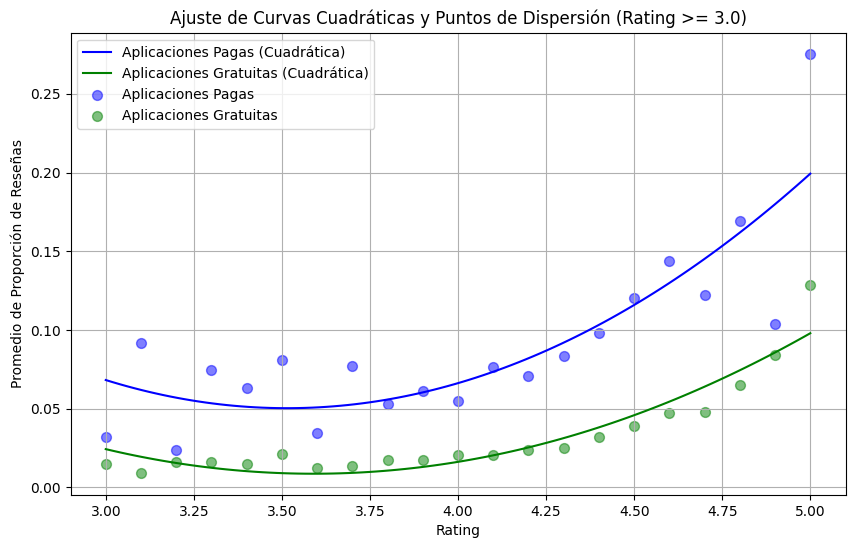

In [ ]:
plt.figure(figsize=(10, 6))

# Curvas cuadráticas
plt.plot(x_curve, y_curve_paid, label='Aplicaciones Pagas (Cuadrática)', color='blue')
plt.plot(x_curve, y_curve_free, label='Aplicaciones Gratuitas (Cuadrática)', color='green')

# Puntos de dispersión
plt.scatter(x_paid, y_paid, alpha=0.5, label='Aplicaciones Pagas', color='blue', marker='o', s=50)
plt.scatter(x_free, y_free, alpha=0.5, label='Aplicaciones Gratuitas', color='green', marker='o', s=50)

plt.xlabel('Rating')
plt.ylabel('Promedio de Proporción de Reseñas')
plt.title('Ajuste de Curvas Cuadráticas y Puntos de Dispersión (Rating >= 3.0)')
plt.grid(True)
plt.legend()
plt.show()



Viendo que las curvas se adaptan bastante bien a los puntos, y dado que:


*   Para todos los valores de X > 3,  **a** * X > 1; y **a** de aplicaciones pagas es mayor a **a** de aplicaciones gratis
*   **c** de aplicaciones pagas es mayor a **c** de aplicaciones gratis
*   Para X > 3, el mínimo de las aplicaciones gratis es menor al de las aplicaciones pagas

Descartamos la hipótesis nula en pos de la hipótesis alternativa.
Queda como trabajo para otra entrega, utilizar un coeficiente como el de pearson o t de student que evalúe la confiabilidad de estos datos.





  

#**Conclusión**
Fui agregando nuevos gráficos, hipótesis y análisis al trabajo. Todavía quedan muchos gráficos e información que agregar. Con el tiempo y nuevos conocimientos que voy sumando se complejiza el mismo.
Estoy evaluando buscar algun dataset alternativo para complementar el trabajo, en el cual se reflejen distintos tipos de monetización en las aplicaciones, lo cual se hace muy importante, sobre todo para mantener la coherencia con el papel que elegí asumir en el abstracto del trabajo.


# Exploración de correlaciones:



In [ ]:
numeric_features = df.select_dtypes(include=[int, float])

correlation_matrix = numeric_features.corr()

correlation_with_installs = correlation_matrix['Installs'].sort_values(ascending=False)

# Muestra las características más correlacionadas con "Installs"
print(correlation_with_installs)

Installs    1.00000
Reviews     0.63203
Size        0.16697
Rating      0.05435
Price      -0.01063
Name: Installs, dtype: float64


Muestra una correlación positiva entre Reviews e Installs. Esto quiere decir, que existe una tendencia por parte del cliente a descargar una aplicación si cuanto más opiniones tenga.

#**Forward selection**

Realizaremos una selección hacia adelante utilizando statsmodels

In [ ]:
import statsmodels.api as sm

df = df.dropna()
numeric_features = df.select_dtypes(include=[int, float])
X = numeric_features.drop('Installs', axis=1)
y = df['Installs']

def forward_selection(data, target, significance_level=0.1): #puse p = 0.1 porque a 0.05 no obtengo ningún resultado
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features = forward_selection(X, y)
print("Features seleccionadas:", selected_features)

Features seleccionadas: ['Reviews', 'Size']


<ipython-input-72-c81fe819b44f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-72-c81fe819b44f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-72-c81fe819b44f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


con p = 0.1 obtenemos como variables con relación a la variable Size, que muestra el peso de la aplicación. Como hipótesis podemos decir, que a mayor peso la gente tenderá a descargarla menos. También asumimos que no hay una relación lineal, sino que la gente tiende a perder interés en descargar una app ya cuando esta tiene un peso considerable.


Probaré con la utilización de regresión de árboles de decisión, y luego veremos el resultado:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_selected = df[['Reviews', 'Size']]
X = df_playstore_free[['Reviews', 'Size']]
y = df_playstore_free['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [ ]:
X['Size'].unique()

array([6.80e+00, 3.90e+01, 1.70e+01, 6.30e+01, 4.40e+01, 2.40e+01,
       5.30e+01, 2.30e+00, 2.90e+01, 3.50e+01, 4.80e+01, 8.40e+01,
       1.50e+01, 6.90e+01, 4.60e+01, 3.30e+01, 7.90e+01, 6.00e+01,
       8.20e+01, 6.90e+00, 1.10e+01, 3.50e+00, 1.60e+01, 4.20e+01,
       4.70e+01, 6.70e+01, 2.60e+01, 7.20e+01, 3.70e+01, 1.20e+00,
       1.20e+01, 8.30e+01, 9.50e+00, 2.30e+01, 7.04e-01, 2.90e+00,
       2.50e+01, 2.00e+01, 2.10e+01, 5.40e+00, 3.20e+01, 1.80e+00,
       3.80e+00, 5.80e+00, 1.90e+01, 5.00e+00, 8.62e-01, 9.90e+00,
       2.40e+00, 8.99e-01, 3.80e+01, 6.50e+00, 1.40e+01, 3.78e-01,
       2.20e+01, 4.80e+00, 2.66e-01, 3.75e-01, 2.80e+00, 9.50e+01,
       2.60e+00, 4.60e+00, 5.10e+00, 8.40e+00, 1.80e+01, 4.10e+01,
       1.00e+02, 3.40e+00, 6.80e+01, 1.30e+00, 7.79e-01, 5.90e+00,
       6.30e+00, 8.60e+00, 6.40e+01, 7.70e+00, 7.40e+01, 5.80e-02,
       1.96e-01, 8.10e+00, 6.10e+00, 1.60e+00, 5.70e+00, 8.57e-01,
       1.50e+00, 5.10e-02, 1.30e+01, 4.30e+01, 8.90e+00, 7.30e

In [ ]:
arbol_regresion = DecisionTreeRegressor(random_state=500)
arbol_regresion.fit(X_train, y_train)



DecisionTreeRegressor(random_state=500)

In [ ]:
y_pred = arbol_regresion.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 793425361670.4762
Coeficiente de Determinación (R^2): 0.18418718626161845


R^2 con un valor cercano a 1, es un valor muy bueno, pero el error cuadrático medio dio un valor extremadamente alto, por lo cual el modelo queda completamente descartado.

Usamos el algoritmo de regresión de bosques aleatorios:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 191506755579282.3
Coeficiente de Determinación (R^2): 0.9385603549729874


Nuevamente el modelo nos arroja un MSE muy alto, por lo cual también queda descartado.
Haremos entonces una regresión lineal:

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 1869128402048087.5
Coeficiente de Determinación (R^2): 0.4003418564302317


Regresión polinómica...

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 1100334287018909.1
Coeficiente de Determinación (R^2): 0.5964375793561447


KNN:

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=1)  # sin importar que número de vecinos ponga, el error sigue siendo muy alto.
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 268929795993458.2
Coeficiente de Determinación (R^2): 0.901366374987356


Para todos los casos, cualquier modelo planteado utilizando la variable size dio resultados que, de ser modelados, estarían en un caso de underfitting muy fuerte. Por el momento, quedan completamente todos descartados.

#Evaluación de modelo de machine learning.

Para este apartado, tomamos los datos de reviews por rating de la tercer entrega, los cuales tenían buena pinta. Entrenamos un modelo en regresión cuadrática y vemos los resultados:

Error Cuadrático Medio (MSE): 0.0019882559015573236
Coeficiente de Determinación (R^2): 0.44968298268354456


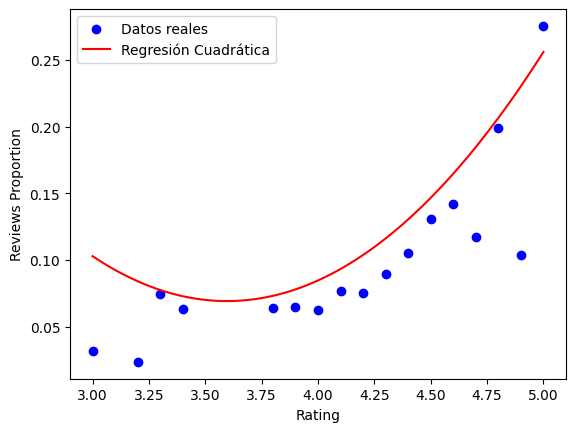

In [ ]:
X = average_reviews_by_rating_paid['Rating'].values.reshape(-1, 1)
y = average_reviews_by_rating_paid['Reviews Proportion'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=40)

poly_transform = PolynomialFeatures(degree=2)

X_train_poly = poly_transform.fit_transform(X_train)
X_test_poly = poly_transform.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

x_curve = np.linspace(X.min(), X.max(), 100)
x_curve_poly = poly_transform.transform(x_curve.reshape(-1, 1))
y_curve = model.predict(x_curve_poly)

plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(x_curve, y_curve, color='red', label='Regresión Cuadrática')
plt.xlabel('Rating')
plt.ylabel('Reviews Proportion')
plt.legend()
plt.show()



Error Cuadrático Medio (MSE) para aplicaciones gratuitas: 0.0004649637330898654
Coeficiente de Determinación (R^2) para aplicaciones gratuitas: 0.4916354603166966


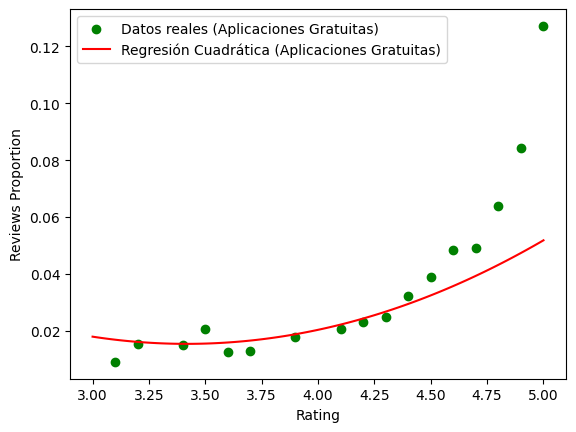

In [ ]:
X = average_reviews_by_rating_free['Rating'].values.reshape(-1, 1)
y = average_reviews_by_rating_free['Reviews Proportion'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=3)

poly_transform = PolynomialFeatures(degree=2)

X_train_poly = poly_transform.fit_transform(X_train)
X_test_poly = poly_transform.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE) para aplicaciones gratuitas:", mse)
print("Coeficiente de Determinación (R^2) para aplicaciones gratuitas:", r2)

x_curve = np.linspace(X.min(), X.max(), 100)
x_curve_poly = poly_transform.transform(x_curve.reshape(-1, 1))
y_curve = model.predict(x_curve_poly)

plt.scatter(X_test, y_test, color='green', label='Datos reales (Aplicaciones Gratuitas)')
plt.plot(x_curve, y_curve, color='red', label='Regresión Cuadrática (Aplicaciones Gratuitas)')
plt.xlabel('Rating')
plt.ylabel('Reviews Proportion')
plt.legend()
plt.show()

Si bien los errores no son groseros, el coeficiente de determinación es muy bajo para ser satisfactorio. Asumimos que puede haber otros modelos que se aproximen más, así como la variable artificial "Proporción de reviews" no tiene una relación tan perfecta con el rating.
Se seguirá investigando.